In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv(r"C:\Users\afrat\Downloads\hotel_booking (1).csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
median_children = df['children'].median()

print(f"The median number of children is: {median_children}")


The median number of children is: 0.0


In [6]:
df['children'] = df.groupby('hotel')['children'].transform(lambda x: x.fillna(x.median()))

df['children_missing'] = df['children'].isnull().astype(int)

print(df[df['children'].isnull()].shape)

(0, 37)


In [7]:

# Drop reservation_status_date column
df.drop(columns=['reservation_status_date','reservation_status'], inplace=True)

# Verify the column has been dropped
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'name',
       'email', 'phone-number', 'credit_card', 'children_missing'],
      dtype='object')


In [8]:
# Drop the email column
df.drop(columns=['email','phone-number','name'], inplace=True)

# Verify the column has been dropped
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'credit_card', 'children_missing'],
      dtype='object')


In [9]:
# Calculate mean or median adr
mean_adr = df['adr'].mean()
median_adr = df['adr'].median()

# Replace negative adr values with the mean or median
# df['adr'] = df['adr'].apply(lambda x: mean_adr if x < 0 else x)  # Use mean
df['adr'] = df['adr'].apply(lambda x: median_adr if x < 0 else x)  # Use median

In [10]:
# Remove rows with 10 children or 10 babies
df = df[(df['children'] != 10) & (df['babies'] != 10)]

In [11]:
df = df[df['adults'] > 0]

In [12]:
print(df['adults'].describe())

count    118985.000000
mean          1.862689
std           0.570064
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64


In [13]:
df.drop(columns=['company'], inplace=True)

# Verify the column has been dropped
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'credit_card', 'children_missing'],
      dtype='object')


In [14]:
df.drop(columns=['agent'], inplace=True)

# Verify the column has been dropped
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'credit_card', 'children_missing'],
      dtype='object')


In [15]:
df.drop(columns=['credit_card'], inplace=True)

# Verify the column has been dropped
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'children_missing'],
      dtype='object')


In [16]:
df.drop(columns=['country'], inplace=True)

# Verify the column has been dropped
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'children_missing'],
      dtype='object')


In [17]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical columns
print(categorical_columns)

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type'],
      dtype='object')


In [18]:
# Get all non-categorical columns (numerical and datetime)
non_categorical_columns = df.select_dtypes(include=['int64', 'float64', 'datetime64[ns]']).columns

# Print the list of non-categorical columns
print(non_categorical_columns)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118985 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  object 
 1   is_canceled                     118985 non-null  int64  
 2   lead_time                       118985 non-null  int64  
 3   arrival_date_year               118985 non-null  int64  
 4   arrival_date_month              118985 non-null  object 
 5   arrival_date_week_number        118985 non-null  int64  
 6   arrival_date_day_of_month       118985 non-null  int64  
 7   stays_in_weekend_nights         118985 non-null  int64  
 8   stays_in_week_nights            118985 non-null  int64  
 9   adults                          118985 non-null  int64  
 10  children                        118985 non-null  float64
 11  babies                          118985 non-null  int64  
 12  meal                 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118985 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  object 
 1   is_canceled                     118985 non-null  int64  
 2   lead_time                       118985 non-null  int64  
 3   arrival_date_year               118985 non-null  int64  
 4   arrival_date_month              118985 non-null  object 
 5   arrival_date_week_number        118985 non-null  int64  
 6   arrival_date_day_of_month       118985 non-null  int64  
 7   stays_in_weekend_nights         118985 non-null  int64  
 8   stays_in_week_nights            118985 non-null  int64  
 9   adults                          118985 non-null  int64  
 10  children                        118985 non-null  float64
 11  babies                          118985 non-null  int64  
 12  meal                 

In [23]:
df = df.drop('arrival_date_week_number', axis=1)

In [25]:
df = df.drop('arrival_date_year', axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118985 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  object 
 1   is_canceled                     118985 non-null  int64  
 2   lead_time                       118985 non-null  int64  
 3   arrival_date_month              118985 non-null  object 
 4   arrival_date_day_of_month       118985 non-null  int64  
 5   stays_in_weekend_nights         118985 non-null  int64  
 6   stays_in_week_nights            118985 non-null  int64  
 7   adults                          118985 non-null  int64  
 8   children                        118985 non-null  float64
 9   babies                          118985 non-null  int64  
 10  meal                            118985 non-null  object 
 11  market_segment                  118985 non-null  object 
 12  distribution_channel 

In [38]:
df['arrival_month_sin'] = np.sin(2*np.pi*(pd.to_datetime(df['arrival_date_month'], format='%B').dt.month-1)/12)
df['arrival_month_cos'] = np.cos(2*np.pi*(pd.to_datetime(df['arrival_date_month'], format='%B').dt.month-1)/12)
df = df.drop('arrival_date_month', axis=1)  

In [61]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True).astype(float)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df[numerical_cols].astype(float)

df_encoded['booking_type'] = np.select(
    [
        (df_encoded['market_segment_Online TA'] == 1),
        (df_encoded['market_segment_Offline TA/TO'] == 1),
        (df_encoded['market_segment_Groups'] == 1)
    ],
    [1, 2, 3], 
    default=0
)

df_encoded['transient_online'] = df_encoded['customer_type_Transient'] * df_encoded['market_segment_Online TA']

cols_to_drop = [
    'market_segment_Online TA',
    'market_segment_Offline TA/TO',
    'market_segment_Groups',
    'distribution_channel_TA/TO',
    'customer_type_Transient',
    'customer_type_Transient-Party'
]
df_encoded = df_encoded.drop(cols_to_drop, axis=1)

X = pd.concat([df_numerical, df_encoded], axis=1)

def clean_for_vif(df):
    """Ensure dataframe is suitable for VIF calculation"""
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.fillna(df.mean())
    return df.loc[:, df.std() > 0]

X_clean = clean_for_vif(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X_clean.columns
vif_data["VIF"] = [variance_inflation_factor(X_clean.values, i)
                  for i in range(X_clean.shape[1])]

vif_sorted = vif_data.sort_values('VIF', ascending=False)
print(vif_sorted)

good_features = vif_sorted[vif_sorted['VIF'] < 10]['feature']
X_final = X_clean[good_features]

print("\nFinal features with VIF < 10:")
print(X_final.columns.tolist())

                           feature        VIF
5                           adults  12.062203
13                             adr   9.279409
25           market_segment_Direct   8.673445
51                    booking_type   8.669596
27     distribution_channel_Direct   7.140191
35            reserved_room_type_G   5.170260
36            reserved_room_type_H   5.057604
44            assigned_room_type_H   5.007649
43            assigned_room_type_G   4.999093
52                transient_online   4.570880
2        arrival_date_day_of_month   4.062088
4             stays_in_week_nights   3.897168
41            assigned_room_type_E   3.856525
33            reserved_room_type_E   3.835766
34            reserved_room_type_F   3.775583
42            assigned_room_type_F   3.658790
40            assigned_room_type_D   3.549952
32            reserved_room_type_D   3.353998
1                        lead_time   3.193648
3          stays_in_weekend_nights   2.555963
0                      is_canceled

In [62]:
from sklearn.model_selection import train_test_split
y = X_final['is_canceled']  
X_final = X_final.drop('is_canceled', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)

In [63]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118985 entries, 0 to 119389
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   adr                             118985 non-null  float64
 1   market_segment_Direct           118985 non-null  float64
 2   booking_type                    118985 non-null  int32  
 3   distribution_channel_Direct     118985 non-null  float64
 4   reserved_room_type_G            118985 non-null  float64
 5   reserved_room_type_H            118985 non-null  float64
 6   assigned_room_type_H            118985 non-null  float64
 7   assigned_room_type_G            118985 non-null  float64
 8   transient_online                118985 non-null  float64
 9   arrival_date_day_of_month       118985 non-null  float64
 10  stays_in_week_nights            118985 non-null  float64
 11  assigned_room_type_E            118985 non-null  float64
 12  reserved_room_type_E 

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42,
    stratify=y_train
)

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1]) 

model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    learning_rate=0.1,
    n_estimators=1000, 
    max_depth=6,
    reg_alpha=2,
    reg_lambda=2,
    eval_metric='auc',
    early_stopping_rounds=50, 
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)], 
    verbose=True
)

print(f"Best iteration: {model.best_iteration}")
print(f"Best score: {model.best_score}")

[0]	validation_0-auc:0.86143
[1]	validation_0-auc:0.86305
[2]	validation_0-auc:0.86514
[3]	validation_0-auc:0.86743
[4]	validation_0-auc:0.86812
[5]	validation_0-auc:0.86866
[6]	validation_0-auc:0.86883
[7]	validation_0-auc:0.86927
[8]	validation_0-auc:0.87015
[9]	validation_0-auc:0.87072
[10]	validation_0-auc:0.87112
[11]	validation_0-auc:0.87172
[12]	validation_0-auc:0.87208
[13]	validation_0-auc:0.87291
[14]	validation_0-auc:0.87382
[15]	validation_0-auc:0.87446
[16]	validation_0-auc:0.87449
[17]	validation_0-auc:0.87464
[18]	validation_0-auc:0.87541
[19]	validation_0-auc:0.87575
[20]	validation_0-auc:0.87594
[21]	validation_0-auc:0.87650
[22]	validation_0-auc:0.87743
[23]	validation_0-auc:0.87767
[24]	validation_0-auc:0.87776
[25]	validation_0-auc:0.87835
[26]	validation_0-auc:0.87956
[27]	validation_0-auc:0.88037
[28]	validation_0-auc:0.88058
[29]	validation_0-auc:0.88111
[30]	validation_0-auc:0.88139
[31]	validation_0-auc:0.88263
[32]	validation_0-auc:0.88266
[33]	validation_0-au

In [65]:
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1] 

print("\n=== Train Set Performance ===")
print(f"AUC: {roc_auc_score(y_train, y_train_pred_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = model.predict(X_val)
y_val_pred_proba = model.predict_proba(X_val)[:, 1]

print("\n=== Validation Set Performance ===")
print(f"AUC: {roc_auc_score(y_val, y_val_pred_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


=== Train Set Performance ===
AUC: 0.9711
Accuracy: 0.9075
Precision: 0.8587
Recall: 0.8982
F1-Score: 0.8780

Confusion Matrix:
 [[38275  3652]
 [ 2514 22190]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.91      0.93     41927
         1.0       0.86      0.90      0.88     24704

    accuracy                           0.91     66631
   macro avg       0.90      0.91      0.90     66631
weighted avg       0.91      0.91      0.91     66631


=== Validation Set Performance ===
AUC: 0.9253
Accuracy: 0.8521
Precision: 0.7895
Recall: 0.8198
F1-Score: 0.8044

Confusion Matrix:
 [[9132 1350]
 [1113 5063]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     10482
         1.0       0.79      0.82      0.80      6176

    accuracy                           0.85     16658
   macro avg       0.84      0.85      0.84     16658
weighted avg       0.85     

In [66]:
import numpy as np

print("Train Class Distribution:")
print(np.unique(y_train, return_counts=True))

print("\nValidation Class Distribution:")
print(np.unique(y_val, return_counts=True))


Train Class Distribution:
(array([0., 1.]), array([41927, 24704], dtype=int64))

Validation Class Distribution:
(array([0., 1.]), array([10482,  6176], dtype=int64))


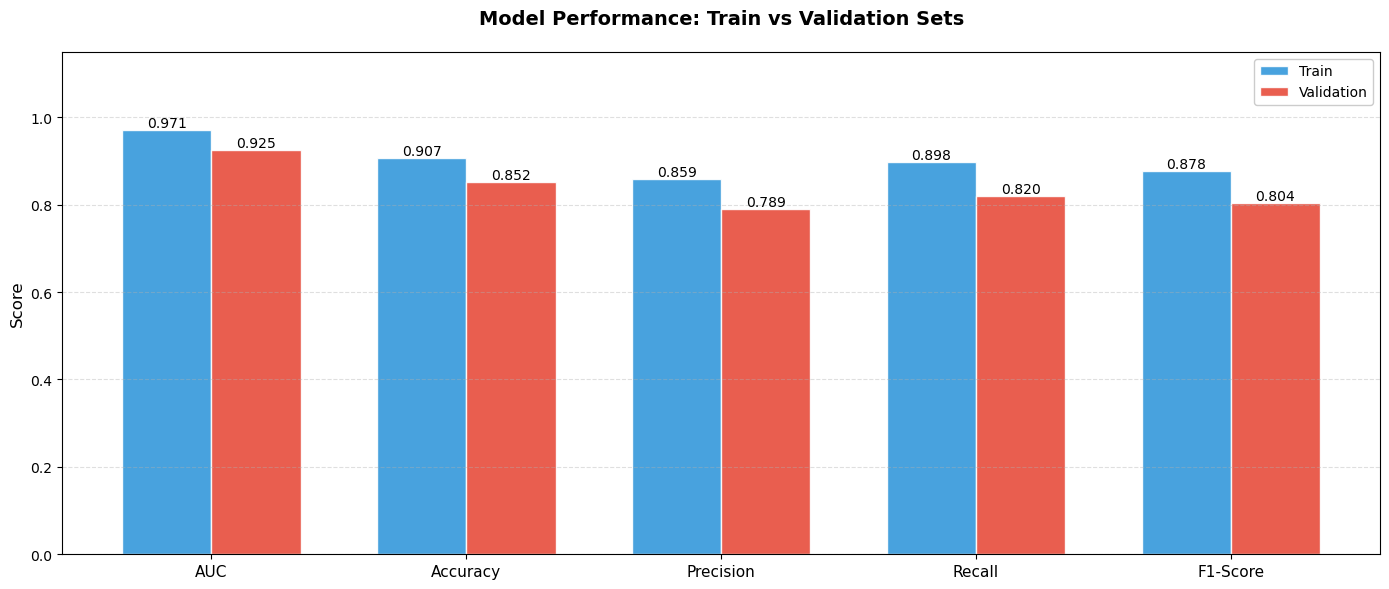

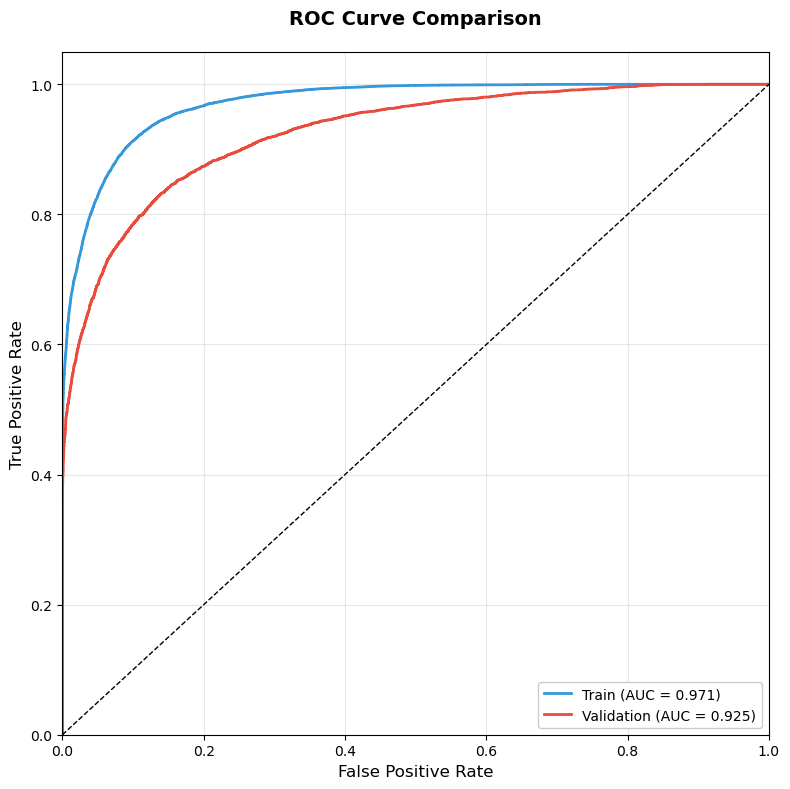

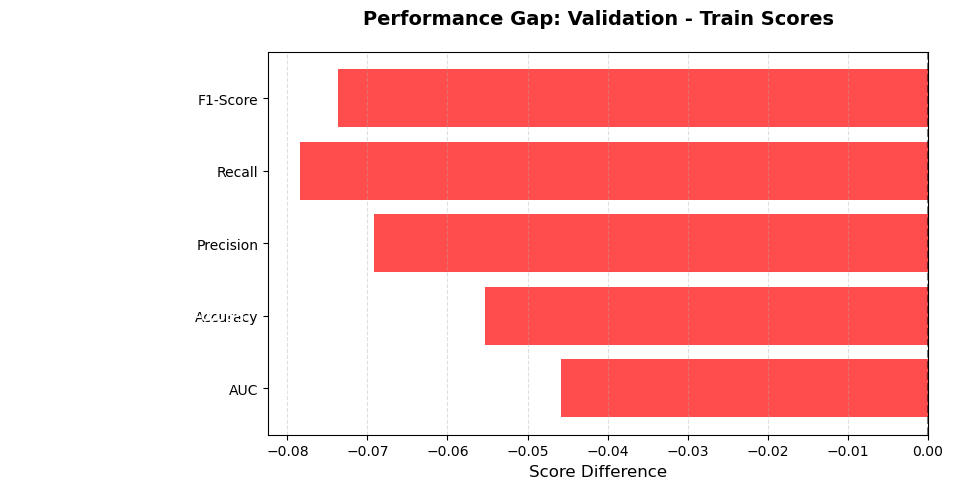

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc


metrics = ['AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
train_scores = [
    roc_auc_score(y_train, y_train_pred_proba),
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred),
    recall_score(y_train, y_train_pred),
    f1_score(y_train, y_train_pred)
]
val_scores = [
    roc_auc_score(y_val, y_val_pred_proba),
    accuracy_score(y_val, y_val_pred),
    precision_score(y_val, y_val_pred),
    recall_score(y_val, y_val_pred),
    f1_score(y_val, y_val_pred)
]

plt.figure(figsize=(14, 6))
x = np.arange(len(metrics))
width = 0.35

train_color = '#3498db'  
val_color = '#e74c3c'    

bars1 = plt.bar(x - width/2, train_scores, width, 
                label='Train', color=train_color, edgecolor='white', alpha=0.9)
bars2 = plt.bar(x + width/2, val_scores, width, 
                label='Validation', color=val_color, edgecolor='white', alpha=0.9)

plt.ylabel('Score', fontsize=12)
plt.title('Model Performance: Train vs Validation Sets', pad=20, fontsize=14, fontweight='bold')
plt.xticks(x, metrics, fontsize=11)
plt.ylim(0, 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.4)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10)

plt.legend(framealpha=1, loc='upper right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_proba)

plt.plot(fpr_train, tpr_train, color=train_color, 
         lw=2, label=f'Train (AUC = {auc(fpr_train, tpr_train):.3f})')
plt.plot(fpr_val, tpr_val, color=val_color,
         lw=2, label=f'Validation (AUC = {auc(fpr_val, tpr_val):.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison', pad=20, fontsize=14, fontweight='bold')
plt.legend(loc="lower right", framealpha=1)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

deltas = np.array(val_scores) - np.array(train_scores)
colors = ['red' if delta < 0 else 'green' for delta in deltas]

plt.figure(figsize=(10, 5))
bars = plt.barh(metrics, deltas, color=colors, alpha=0.7)
plt.axvline(0, color='black', linestyle='--', alpha=0.5)
plt.title('Performance Gap: Validation - Train Scores', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Score Difference', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

for bar in bars:
    width = bar.get_width()
    label = f"{width:.3f}"
    if width < 0:
        plt.text(width - 0.03, bar.get_y() + bar.get_height()/2, 
                label, ha='right', va='center', color='white', fontweight='bold')
    else:
        plt.text(width + 0.03, bar.get_y() + bar.get_height()/2, 
                label, ha='left', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()